In [46]:
from google.colab import drive

In [47]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [48]:
import os,shutil

In [49]:
original_data='/content/gdrive/My Drive/Data for DL/Data for DL'

In [50]:
base_dir='/content/mini_pro'

In [18]:
os.mkdir(base_dir)

In [51]:
train_dir=os.path.join(base_dir,'train')

In [19]:
os.mkdir(train_dir)

In [52]:
validation_dir=os.path.join(base_dir,'validation')

In [20]:
os.mkdir(validation_dir)

In [53]:
test_dir=os.path.join(base_dir,'test')

In [21]:
os.mkdir(test_dir)

In [22]:
train_drone_dir=os.path.join(train_dir,'drone')
os.mkdir(train_drone_dir)

In [23]:
train_fighter_jet_dir=os.path.join(train_dir,'fighter_jet')
os.mkdir(train_fighter_jet_dir)

In [24]:
train_helicopter_dir=os.path.join(train_dir,'helicopter')
os.mkdir(train_helicopter_dir)

In [25]:
train_missile_dir=os.path.join(train_dir,'missile')
os.mkdir(train_missile_dir)

In [26]:
train_passenger_plane_dir=os.path.join(train_dir,'passenger_plane')
os.mkdir(train_passenger_plane_dir)

In [27]:
train_rocket_dir=os.path.join(train_dir,'rocket')
os.mkdir(train_rocket_dir)

In [28]:
validation_drone_dir=os.path.join(validation_dir,'drone')
os.mkdir(validation_drone_dir)

In [29]:
validation_fighter_jet_dir=os.path.join(validation_dir,'fighter_jet')
os.mkdir(validation_fighter_jet_dir)

In [30]:
validation_helicopter_dir=os.path.join(validation_dir,'helicopter')
os.mkdir(validation_helicopter_dir)

In [31]:
validation_missile_dir=os.path.join(validation_dir,'missile')
os.mkdir(validation_missile_dir)

In [32]:
validation_passenger_plane_dir=os.path.join(validation_dir,'passenger_plane')
os.mkdir(validation_passenger_plane_dir)

In [33]:
validation_rocket_dir=os.path.join(validation_dir,'rocket')
os.mkdir(validation_rocket_dir)

In [34]:
test_drone_dir=os.path.join(test_dir,'drone')
os.mkdir(test_drone_dir)

In [35]:
test_fighter_jet_dir=os.path.join(test_dir,'fighter_jet')
os.mkdir(test_fighter_jet_dir)

In [36]:
test_helicopter_dir=os.path.join(test_dir,'helicopter')
os.mkdir(test_helicopter_dir)

In [37]:
test_missile_dir=os.path.join(test_dir,'missile')
os.mkdir(test_missile_dir)

In [38]:
test_passenger_plane_dir=os.path.join(test_dir,'passenger_plane')
os.mkdir(test_passenger_plane_dir)

In [39]:
test_rocket_dir=os.path.join(test_dir,'rocket')
os.mkdir(test_rocket_dir)


In [40]:
names=['drone','fighter_jet','helicopter','missile','passenger_plane','rocket']

In [41]:
train_list=['/content/mini_pro/train/{}'.format(name) for name in names]
validation_list=['/content/mini_pro/validation/{}'.format(name) for name in names]
test_list=['/content/mini_pro/test/{}'.format(name) for name in names]


In [336]:
l_dir=['/content/gdrive/My Drive/Data for DL/Data for DL/drone','/content/gdrive/My Drive/Data for DL/Data for DL/fighter-jet'
         ,'/content/gdrive/My Drive/Data for DL/Data for DL/helicopter'
         ,'/content/gdrive/My Drive/Data for DL/Data for DL/missile',
         '/content/gdrive/My Drive/Data for DL/Data for DL/passenger-plane','/content/gdrive/My Drive/Data for DL/Data for DL/rocket']

In [335]:
fn0=[]
fn1=[]
fn2=[]
fn3=[]
fn4=[]
fn5=[]
b=[fn0,fn1,fn2,fn3,fn4,fn5]

In [337]:
for i in range(6):
    b[i]=os.listdir(l_dir[i])

In [55]:
for i in range(6):
  for fname in range(int((len(b[i]))*0.5)):
    src = os.path.join(l_dir[i], b[i][fname])
    dst = os.path.join(train_list[i], b[i][fname])
    shutil.copyfile(src, dst)

  for fname in range(int((len(b[i]))*0.5),int((len(b[i]))*0.75)):
    src = os.path.join(l_dir[i], b[i][fname])
    dst = os.path.join(validation_list[i], b[i][fname])
    shutil.copyfile(src, dst)

  for fname in range(int((len(b[i]))*0.75),int(len(b[i]))):
    src = os.path.join(l_dir[i],b[i][fname])
    dst = os.path.join(test_list[i],b[i][fname])
    shutil.copyfile(src, dst)
  

In [7]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras.applications import VGG16

In [8]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
 conv_base.trainable = False

In [12]:
model = Sequential()
model.add(conv_base)

model.add(Conv2D(filters=600, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=600, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(Conv2D(filters=600, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())


model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=6, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 600)         2765400   
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 600)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 600)         3240600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 600)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 600)         3240600   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 600)         0

In [14]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
 zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255) 

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')
history = model.fit_generator(train_generator,steps_per_epoch=50,epochs=20,validation_data=validation_generator,validation_steps=25)

NameError: ignored

In [406]:
history.history['acc']

[0.21799999475479126,
 0.20941883325576782,
 0.27799999713897705,
 0.2939999997615814,
 0.3319999873638153,
 0.3269999921321869,
 0.35070139169692993,
 0.38600000739097595,
 0.38600000739097595,
 0.41600000858306885,
 0.4339999854564667,
 0.4268537163734436,
 0.4650000035762787,
 0.4769538938999176,
 0.460999995470047,
 0.48399999737739563,
 0.49300000071525574,
 0.49399998784065247,
 0.4719438850879669,
 0.5070000290870667]

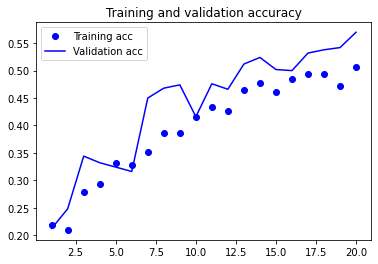

In [407]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()



In [408]:
test_gen= test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')

test_loss, test_acc = model.evaluate(test_gen,steps=50)

Found 2114 images belonging to 6 classes.
50/50 [==============================] - 17s 337ms/step - loss: 1.3135 - acc: 0.4910


In [409]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')

Found 2112 images belonging to 6 classes.


In [410]:
val_len=0
for i in range(6):
  val_len=val_len+int((len(b[i]))*0.75)-int((len(b[i]))/2) 


In [411]:
val_len

2139

In [412]:


from sklearn.metrics import confusion_matrix
import numpy as np
batch_size=20



prob=model.predict_generator(validation_generator,val_len//batch_size+1)
y_pred=np.argmax(prob,axis=1)
y_true=validation_generator.classes

c = confusion_matrix(y_true, y_pred)
print('confusion matrix')
print(c)
 

confusion matrix
[[ 59  89  63  77  43   0]
 [ 86 135  81  98  62   0]
 [ 83 104  40  68  46   0]
 [ 66 124  55  50  36   0]
 [ 70 108  46  76  54   0]
 [ 52  89  42  75  35   0]]
